# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
from scipy import stats

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')


In [3]:
hospital_read_df.head(2)

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013


****
## Preliminary Analysis

In [5]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df['Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


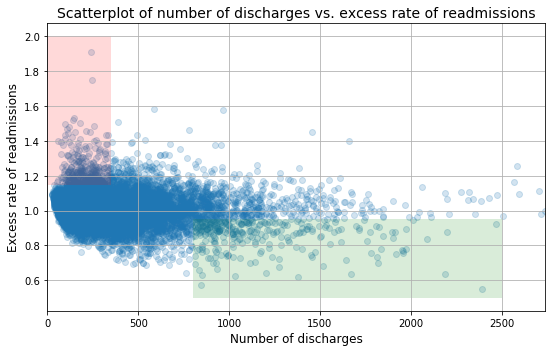

In [6]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

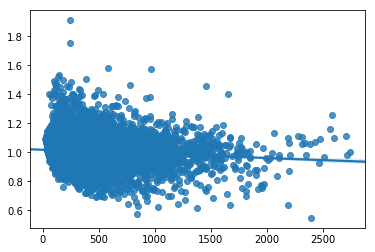

In [7]:
sns.regplot(data=clean_hospital_read_df, x=x, y=y)
plt.show()

In [10]:
df_small = clean_hospital_read_df[['Number of Discharges', 'Excess Readmission Ratio']][81:-3].reset_index(drop=True)
df_small.head()

,Number of Discharges,Excess Readmission Ratio
0,25,1.0914
1,27,1.0961
2,28,1.0934
3,29,1.0908
4,30,1.1123


In [16]:
def r_value(data):
    x = data.iloc[:,0]
    y = data.iloc[:,1]
    return stats.pearsonr(x, y)[0]

r_value(df_small)

-0.09309554287590441

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [12]:
# Your turn
len(df_small)

11494

The correlation coefficient of this relationship is very low, it's possible that the true correlation is 0 and this specific sample showed a negative correlation by chance. Our Null Hypothesis will be that r = 0 and our alternative is that r != 0

In [13]:
def bootstrap_replicate_2d(data, func):
    """generate bootstrap replicate of 1D data"""
    bs_sample = np.random.choice(list(range(len(data))), len(data))
    bs_df = df_small[df_small.index.isin(bs_sample)]
    return func(bs_df)

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_2d(data, func)

    return bs_replicates

In [14]:
bootstrap_replicate_2d(df_small, r_value)

(-0.08333997442379293, 1.0122748471841904e-12)

In [17]:
reps = draw_bs_reps(df_small, r_value, 1000)

len(reps)

1000

In [41]:
sorted_reps = np.sort(reps)

In [38]:
interval = np.percentile(sorted_reps, [2.5, 97.5])
interval

array([-0.10949101, -0.07687274])

Since our null hypothesis is that the r value is 0, and zero is outside of our confidence interval, we can be confident that the correlation is not due to random chance and is indeed accurate for the population. 

we also could have just run the stats.pearsonr function on our data to see that the p-value of the correlation is very very low and come to the same conclusion. 

In [40]:
x = df_small.iloc[:,0]
y = df_small.iloc[:,1]
stats.pearsonr(x, y)

(-0.09309554287590441, 1.5022756426464526e-23)

The data clearly shows a negative correlation. This means that in general, a smaller clinic will have a slightly higher rate of readmissions than a larger clinic. While we have shown that this correlation is in fact significant, I believe that more work needs to be done before we assume that small clinics are providing worse care than large clinics. The author comes to the conclusion that small clinics may not have the resources and equipment that larger clinics have and this leads to a higher readmission rate. However, it is possible that the correlation is due to other reasons. For example, smaller clinics might be more prone to dealing with specialized services, like orthopedics or geriatrics, in which case a higher readmission rate might be expected. Smaller clinics may be located in more rural areas, which could impact readmission rates, whereas large hospitals are more likely to be found in densely populated areas like cities. Perhaps readmission rates are affected by the local populations. Perhaps people are more comfortable returning to smaller clinics than large hospitals. Maybe people are more likely to deal with an illness than return to an uncomfortable large hospital that might involve a long wait time, whereas a return to a small clinic is less of a hassle. I think that the next step may be to look at specific illnesses that are being treated and see if there is a difference in readmission rates for those illnesses only.